In [1]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O vgsales.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
To: /content/vgsales.csv
100% 2.04M/2.04M [00:00<00:00, 21.4MB/s]


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16652 entries, 0 to 16651
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16652 non-null  int64  
 1   Name          16652 non-null  object 
 2   Platform      16652 non-null  object 
 3   Year          16381 non-null  float64
 4   Genre         16652 non-null  object 
 5   Publisher     16594 non-null  object 
 6   NA_Sales      16652 non-null  float64
 7   EU_Sales      16652 non-null  float64
 8   JP_Sales      16652 non-null  float64
 9   Other_Sales   16652 non-null  float64
 10  Global_Sales  16652 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#Prepare the data

In [5]:
data['Publisher'].head()

,Publisher
0,Capcom
1,505 Games
2,Namco Bandai Games
3,Namco Bandai Games
4,Namco Bandai Games


In [6]:
data['Publisher'].value_counts().head()

,count
Publisher,
Electronic Arts,1351
Activision,1014
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832


In [8]:
data['Publisher'].value_counts().index[:3]

Index(['Electronic Arts', 'Activision', 'Namco Bandai Games'], dtype='object', name='Publisher')

In [9]:
top3_pub = data['Publisher'].value_counts().index[:3]
top3_pub

Index(['Electronic Arts', 'Activision', 'Namco Bandai Games'], dtype='object', name='Publisher')

In [10]:
top3_gen = data['Genre'].value_counts().index[:3]
top3_gen

Index(['Action', 'Sports', 'Misc'], dtype='object', name='Genre')

In [11]:
top3_plat = data['Platform'].value_counts().index[:3]
top3_plat

Index(['DS', 'PS2', 'PS3'], dtype='object', name='Platform')

In [13]:
top3_data =[data['Publisher'].isin(top3_pub) & data['Genre'].isin(top3_gen) & data['Platform'].isin(top3_plat)]
top3_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257


In [14]:
top3_data.shape

(617, 11)

In [15]:
#Multi-Variate Analysis -> N-N-C
#How can we visualize the correlation between NA and EU, but for different publisher?

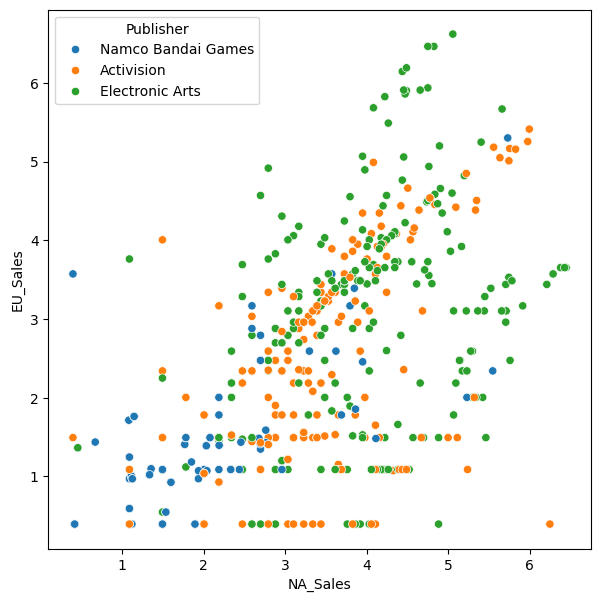

In [18]:
plt.figure(figsize=(7,7))

#scatterplot

sns.scatterplot(data=top3_data, x='NA_Sales', y='EU_Sales', hue='Publisher')
plt.show()

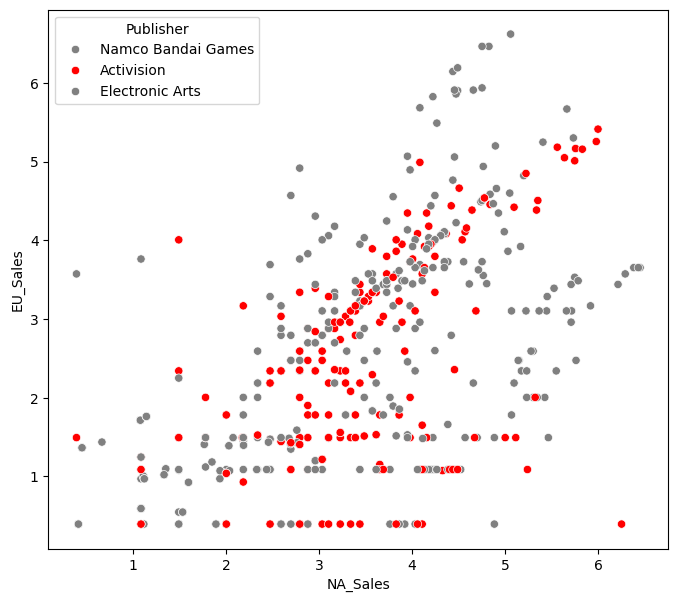

In [17]:
plt.figure(figsize=(8,7))

custom_palette = {'Activision' : 'red', 'Namco Bandai Games' : 'gray', 'Electronic Arts' : 'gray'}
sns.scatterplot(data=top3_data, x='NA_Sales', y='EU_Sales', hue='Publisher', palette=custom_palette)
plt.show()

In [ ]:
#C-C-N
#How will you visualize the global sales for each publisher, but separated by genres?

In [19]:
#Boxplot

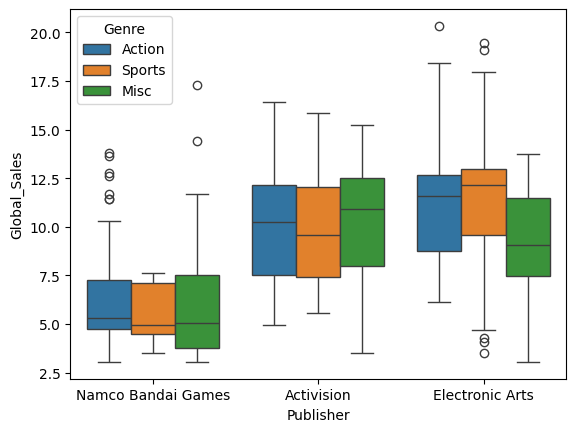

In [20]:
sns.boxplot(x='Publisher', y='Global_Sales', hue='Genre',data=top3_data)
plt.show()

In [21]:
#N-N-N
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


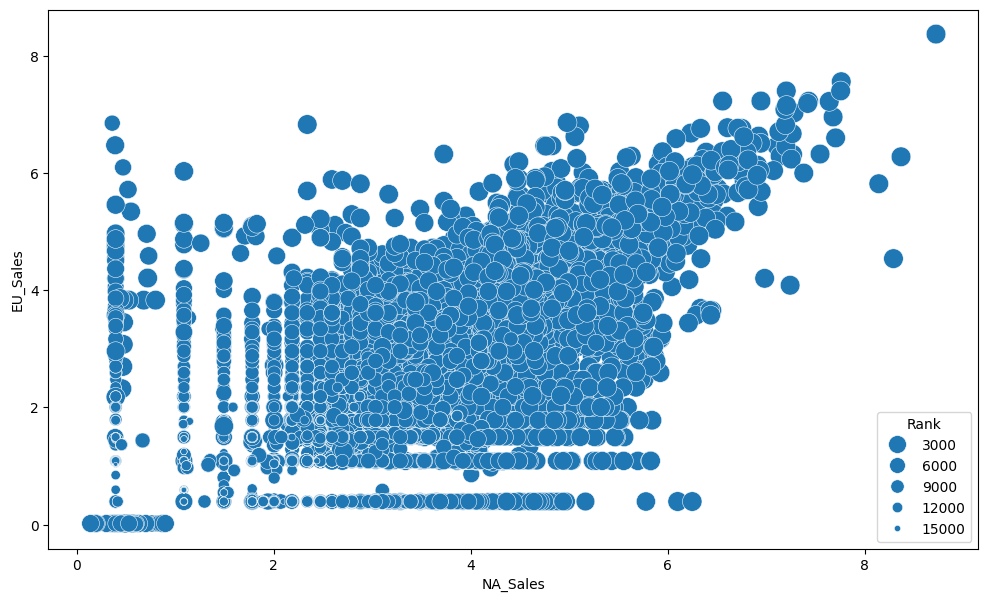

In [26]:
plt.figure(figsize=(12,7))

#scatterplot

sns.scatterplot(data=data, x='NA_Sales', y='EU_Sales', size='Rank', sizes=(200,1))
plt.show()

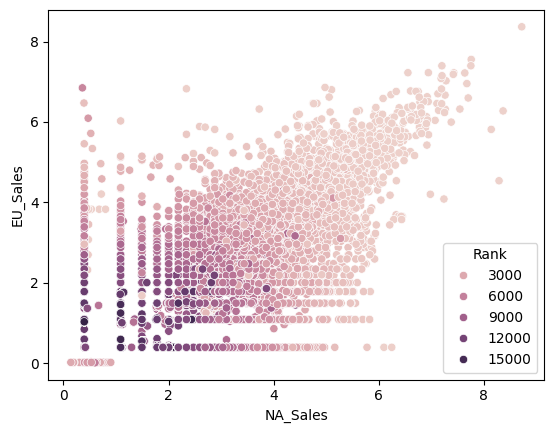

In [27]:

#sns.scatterplot(data=data, x='NA_Sales', y='EU_Sales', hue='Rank')
#plt.show()

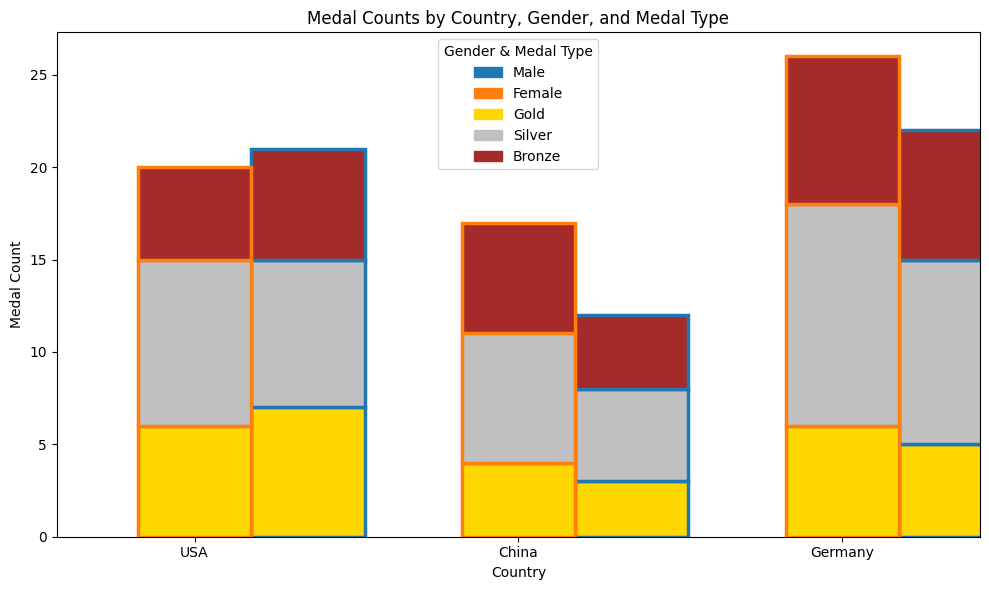

In [28]:
#C-C-C

# Example DataFrame
data = {
    'Country': ['USA', 'USA', 'China', 'China', 'Germany', 'Germany'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Gold': [10, 12, 8, 9, 5, 7],
    'Silver': [7, 8, 6, 5, 4, 6],
    'Bronze': [5, 6, 7, 6, 3, 4]
}

df = pd.DataFrame(data)

# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars=['Country', 'Gender'], var_name='Medal Type', value_name='Count')

# Creating the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.35
countries = df['Country'].unique()
positions = np.arange(len(countries))

# Define colors for genders (hue effect)
gender_colors = {'Male': '#1f77b4', 'Female': '#ff7f0e'}  # Blue for Male, Orange for Female

# Plot stacked bars for Male and Female separately
for idx, gender in enumerate(df['Gender'].unique()):
    df_gender = df_melted[df_melted['Gender'] == gender]
    df_pivot = df_gender.pivot_table(index='Country', columns='Medal Type', values='Count', aggfunc='sum')
    df_pivot.plot(kind='bar', stacked=True, ax=ax, width=bar_width,
                  position=idx-0.5, color=['gold', 'silver', 'brown'],
                  label=f"{gender}", edgecolor=gender_colors[gender], linewidth=2.5)

# Set custom x-ticks for country-gender groups
ax.set_xticks(positions)
ax.set_xticklabels(countries, rotation=0)

# Add a legend for genders separately
from matplotlib.patches import Patch
legend_patches = [Patch(facecolor=color, edgecolor=color, label=gender) for gender, color in gender_colors.items()]
plt.legend(handles=legend_patches + [Patch(color='gold', label='Gold'), Patch(color='silver', label='Silver'), Patch(color='brown', label='Bronze')], title='Gender & Medal Type')

# Customize plot
plt.title('Medal Counts by Country, Gender, and Medal Type')
plt.xlabel('Country')
plt.ylabel('Medal Count')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


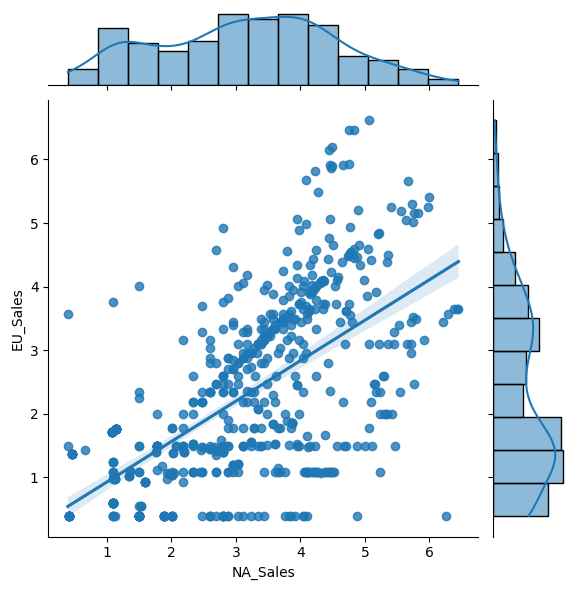

In [30]:
#Other types of plot

#Joint plot
sns.jointplot(data=top3_data, x='NA_Sales', y='EU_Sales', kind='reg')
plt.show()


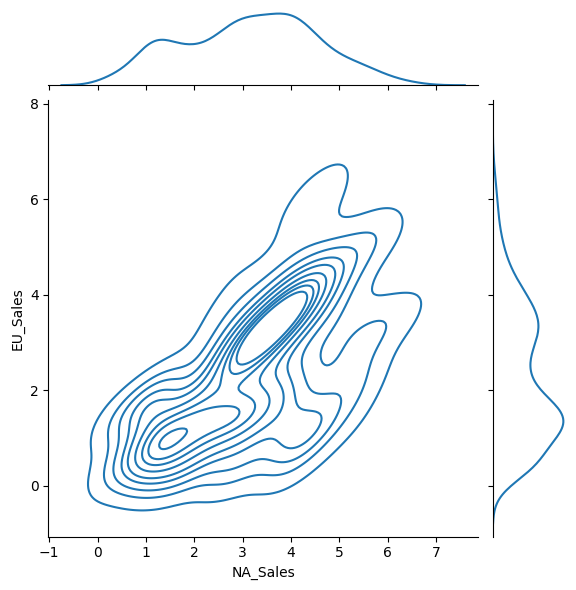

In [31]:
sns.jointplot(data=top3_data, x='NA_Sales', y='EU_Sales', kind='kde')
plt.show()


In [32]:
#Pair plot

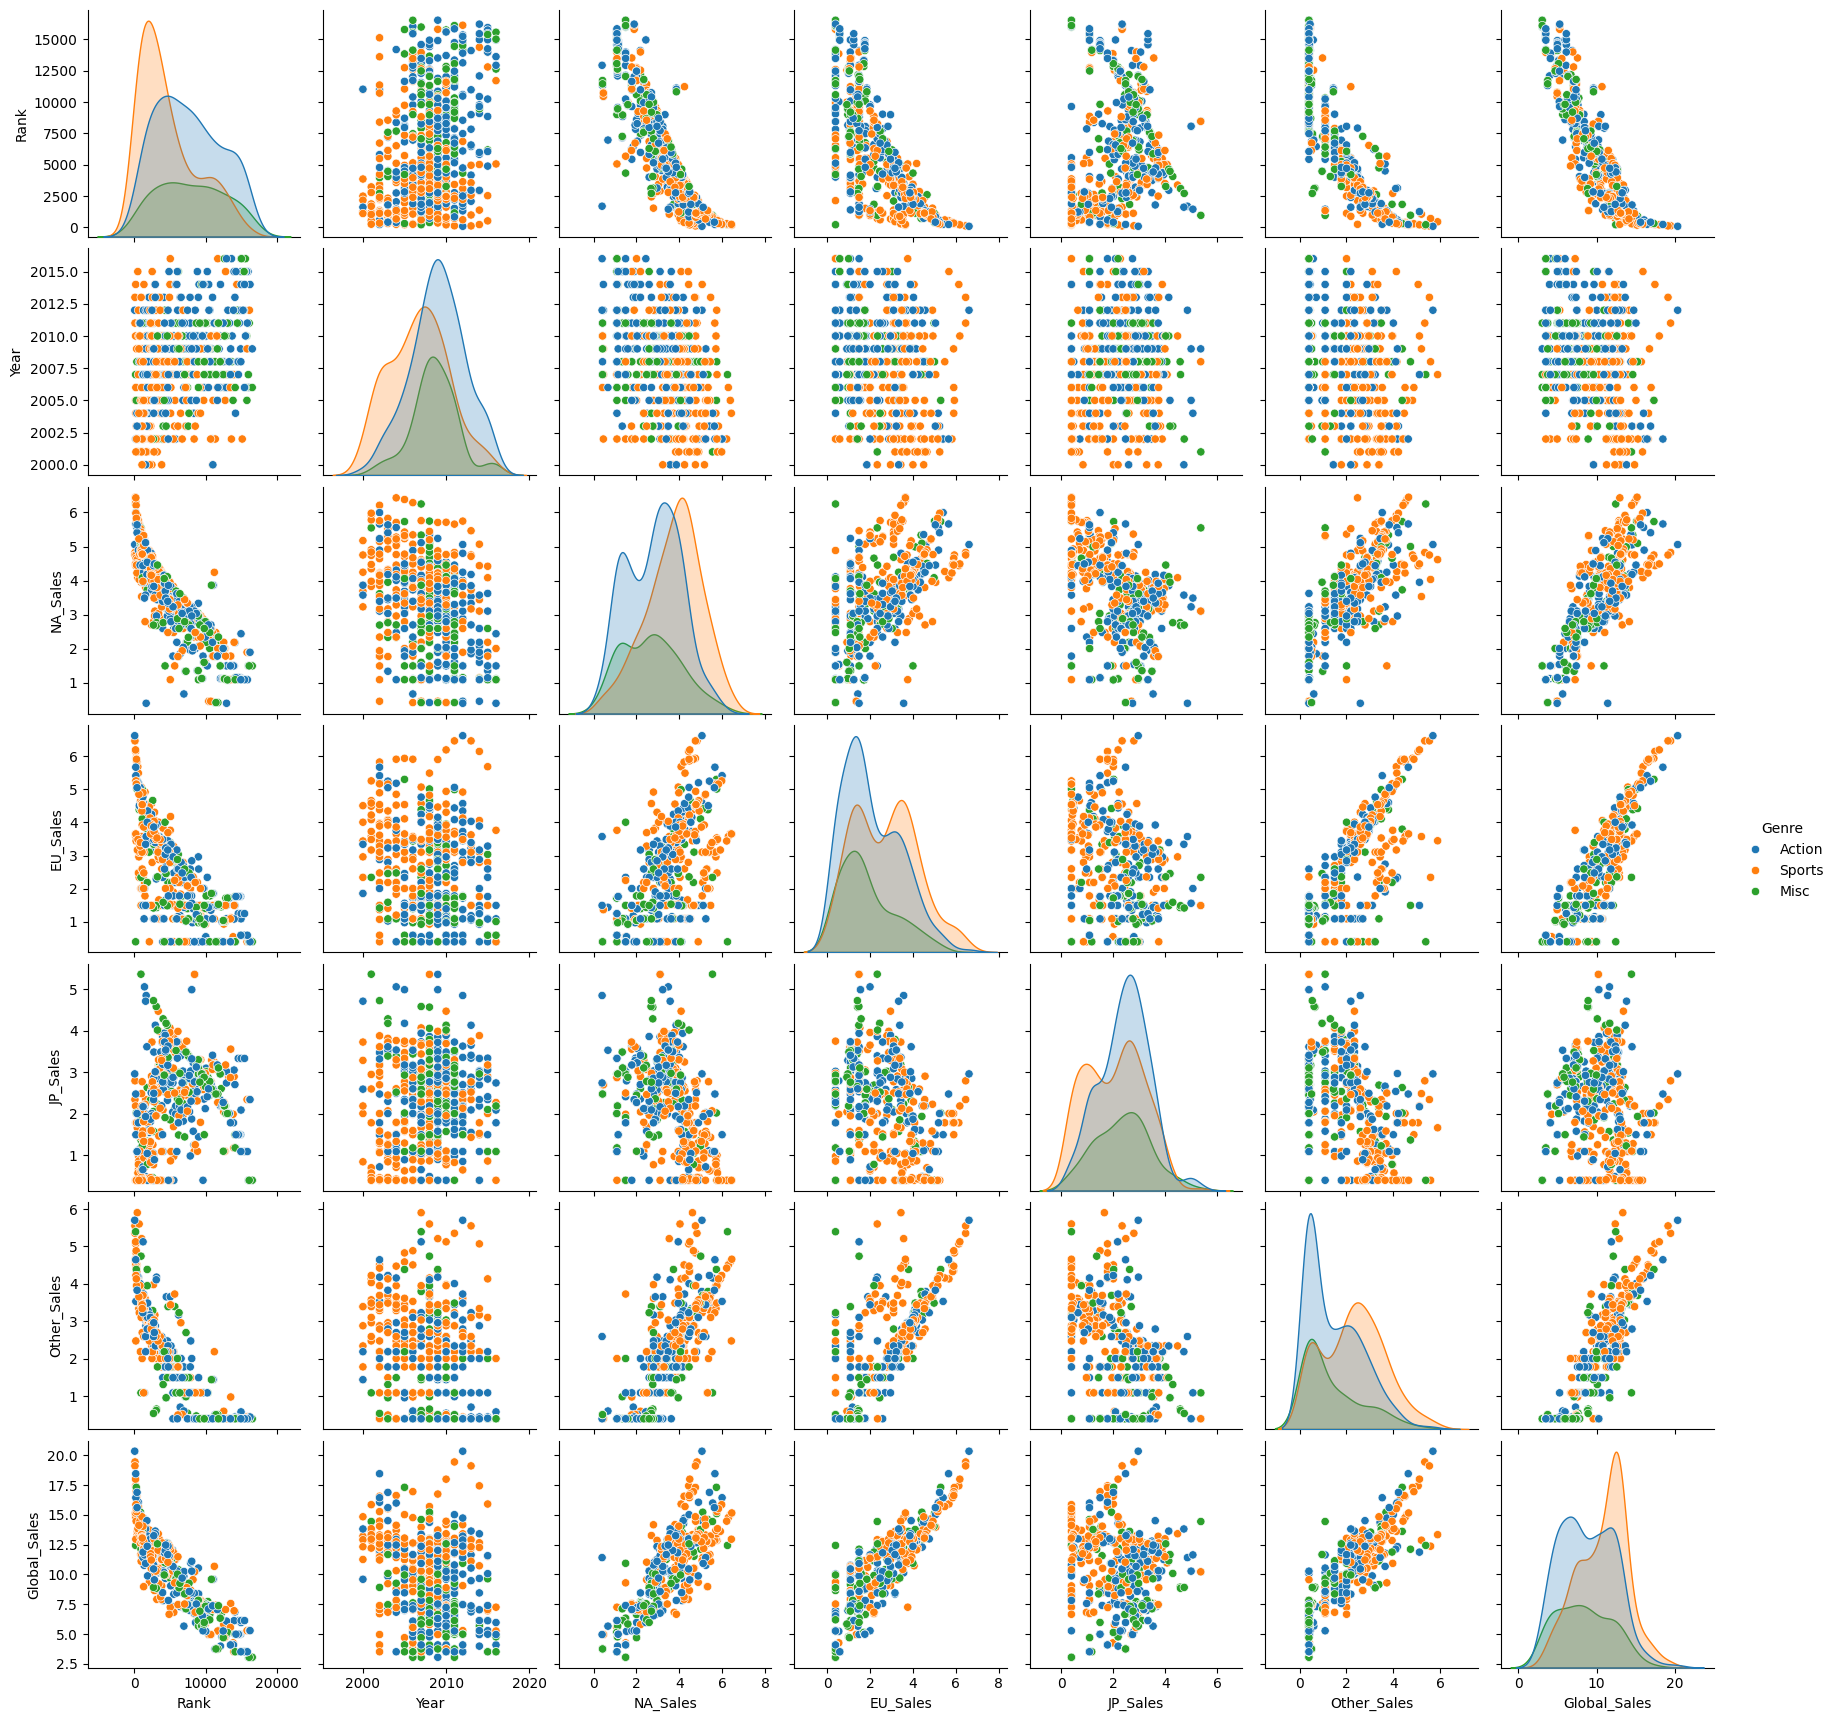

In [34]:
sns.pairplot(data=top3_data, hue='Genre')
plt.show()

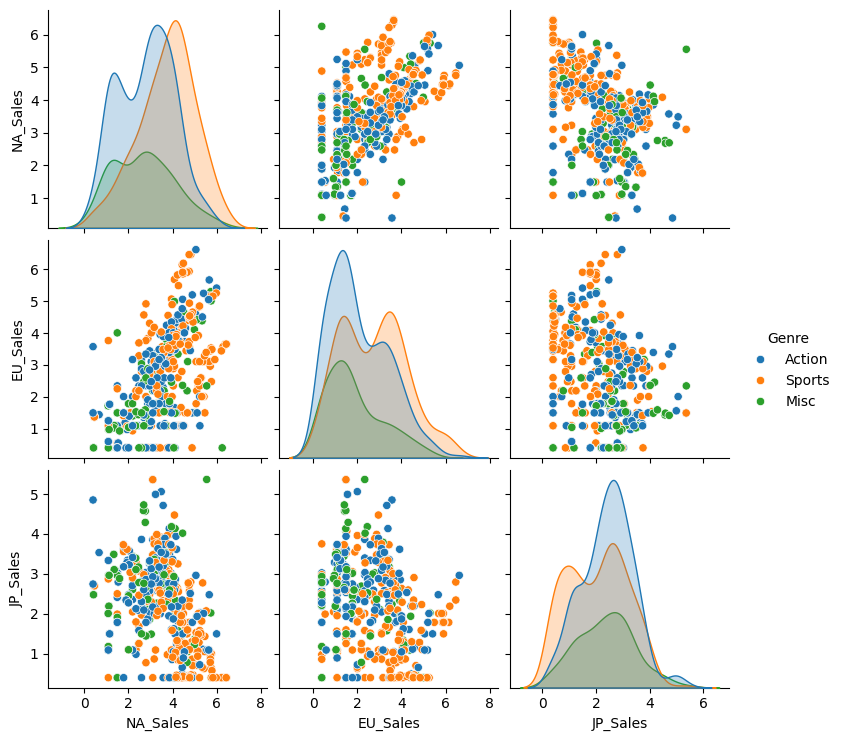

In [35]:
#Subset

sns.pairplot(data=top3_data, hue='Genre', vars=['NA_Sales', 'EU_Sales', 'JP_Sales'])
plt.show()

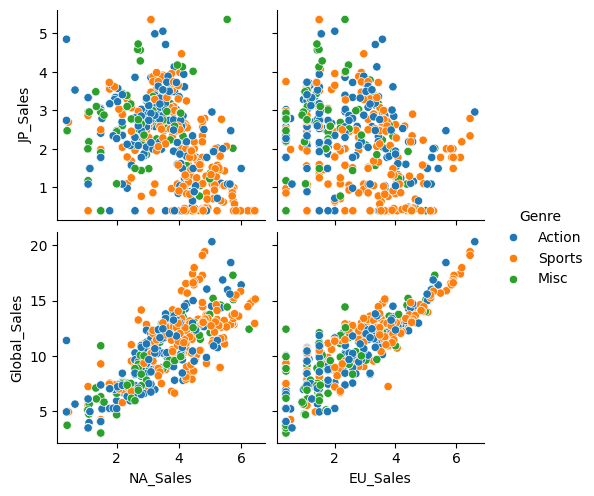

In [36]:

sns.pairplot(data=top3_data, hue='Genre', x_vars=['NA_Sales', 'EU_Sales'], y_vars=['JP_Sales','Global_Sales'])
plt.show()

In [37]:
#HeatMap - Correlation

top3_data.corr()

ValueError: could not convert string to float: '.hack: Sekai no Mukou ni + Versus'

In [38]:
top3_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257


In [39]:
top3_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 2 to 16640
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          617 non-null    int64  
 1   Name          617 non-null    object 
 2   Platform      617 non-null    object 
 3   Year          611 non-null    float64
 4   Genre         617 non-null    object 
 5   Publisher     617 non-null    object 
 6   NA_Sales      617 non-null    float64
 7   EU_Sales      617 non-null    float64
 8   JP_Sales      617 non-null    float64
 9   Other_Sales   617 non-null    float64
 10  Global_Sales  617 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 57.8+ KB


In [40]:
numeric_df = top3_data.select_dtypes(include=['float', 'int'])
numeric_df.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,2012.0,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,2012.0,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,2009.0,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,2008.0,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,2008.0,3.228043,2.738800,2.585598,3.652926,11.780257


In [41]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 2 to 16640
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          617 non-null    int64  
 1   Year          611 non-null    float64
 2   NA_Sales      617 non-null    float64
 3   EU_Sales      617 non-null    float64
 4   JP_Sales      617 non-null    float64
 5   Other_Sales   617 non-null    float64
 6   Global_Sales  617 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 38.6 KB


In [42]:
#correlation matrix #heatmap

numeric_df.corr() #correlation coeff #pearson c.c

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.328705,-0.873726,-0.735711,0.115459,-0.857567,-0.911721
Year,0.328705,1.000000,-0.354256,-0.178026,0.055864,-0.239876,-0.280351
NA_Sales,-0.873726,-0.354256,1.000000,0.617483,-0.233315,0.794353,0.856300
EU_Sales,-0.735711,-0.178026,0.617483,1.000000,-0.208249,0.771105,0.864147
JP_Sales,0.115459,0.055864,-0.233315,-0.208249,1.000000,-0.355825,-0.014193
Other_Sales,-0.857567,-0.239876,0.794353,0.771105,-0.355825,1.000000,0.878816
Global_Sales,-0.911721,-0.280351,0.856300,0.864147,-0.014193,0.878816,1.000000


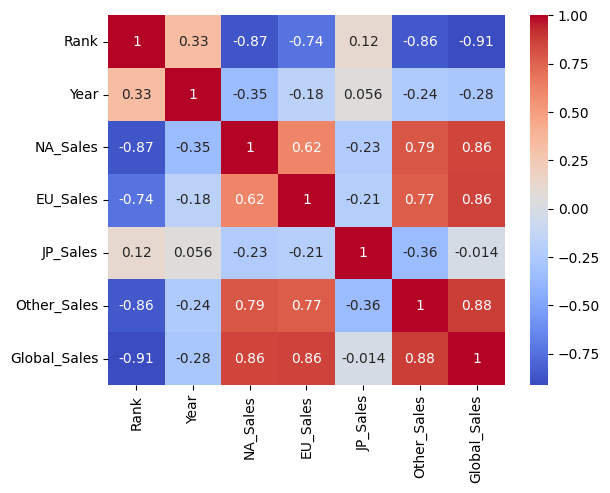

In [52]:
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [45]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

In [47]:
#Spanning of plots across the grid layout

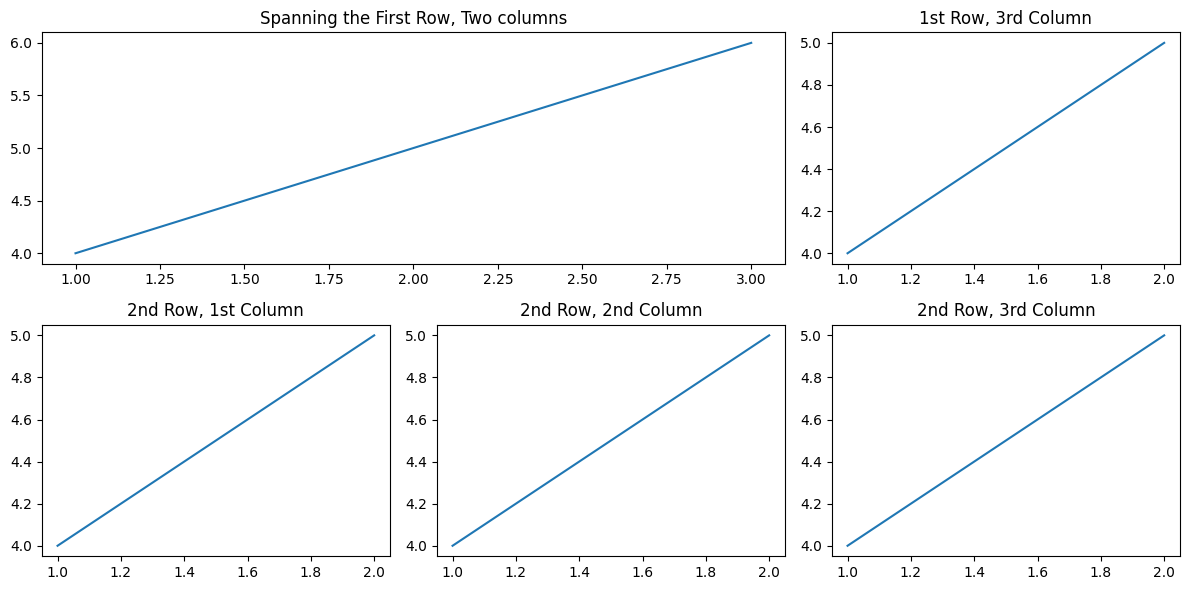

In [48]:
plt.figure(figsize=(12, 6))

# Subplot spanning across the first row
plt.subplot(2, 3, (1, 2)) #(1,2)<-> (1 and 2 index positions)
plt.title('Spanning the First Row, Two columns')
plt.plot([1, 2, 3], [4, 5, 6])

plt.subplot(2, 3, 3) #(233)
plt.title('1st Row, 3rd Column')
plt.plot([1, 2], [4, 5])

# Other subplots
plt.subplot(2, 3, 4)
plt.title('2nd Row, 1st Column')
plt.plot([1, 2], [4, 5])

plt.subplot(2, 3, 5)
plt.title('2nd Row, 2nd Column')
plt.plot([1, 2], [4, 5])

plt.subplot(2, 3, 6)
plt.title('2nd Row, 3rd Column')
plt.plot([1, 2], [4, 5])

plt.tight_layout()
plt.show()


In [ ]:
#Quiz 1

We are analyzing the results of the Olympics, and want to find the count of gold, silver, and bronze medals won by each country. Which will be the best suited plot for this?

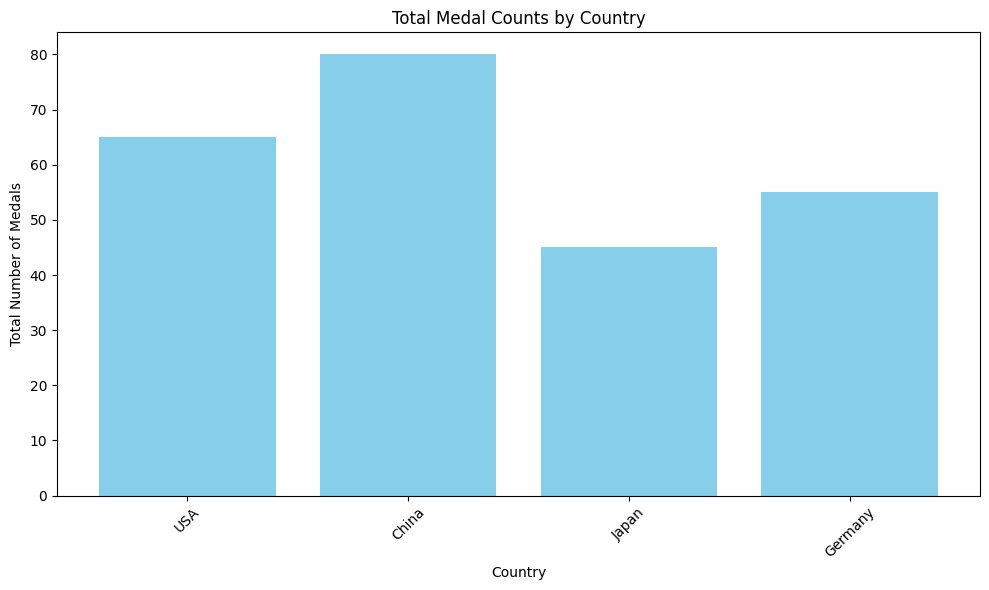

In [49]:
# Example DataFrame
data = {
    'Country': ['USA', 'China', 'Japan', 'Germany'],
    'Gold': [30, 35, 20, 25],
    'Silver': [20, 25, 15, 18],
    'Bronze': [15, 20, 10, 12]
}

df = pd.DataFrame(data)

# Calculate total medals
df['Total'] = df[['Gold', 'Silver', 'Bronze']].sum(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['Total'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Number of Medals')
plt.title('Total Medal Counts by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

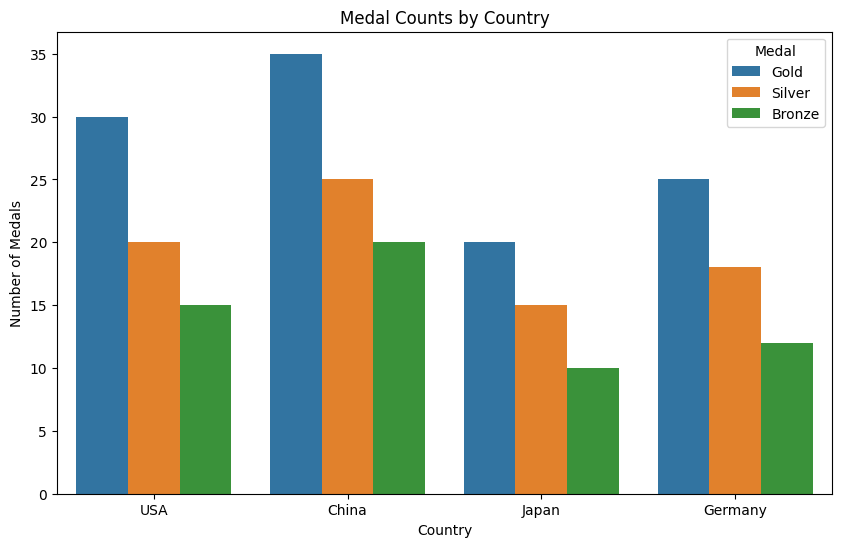

In [50]:
data = {
    'Country': ['USA', 'China', 'Japan', 'Germany'],
    'Gold': [30, 35, 20, 25],
    'Silver': [20, 25, 15, 18],
    'Bronze': [15, 20, 10, 12]
}

df = pd.DataFrame(data)

# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars='Country', var_name='Medal', value_name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Count', hue='Medal', data=df_melted)
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Medal Counts by Country')
plt.show()

In [ ]:
#Quiz 2

Suppose in a 2x3 subplot (2 rows 3 columns), we want to create a plot to span across the first row. What would be the right code for this?

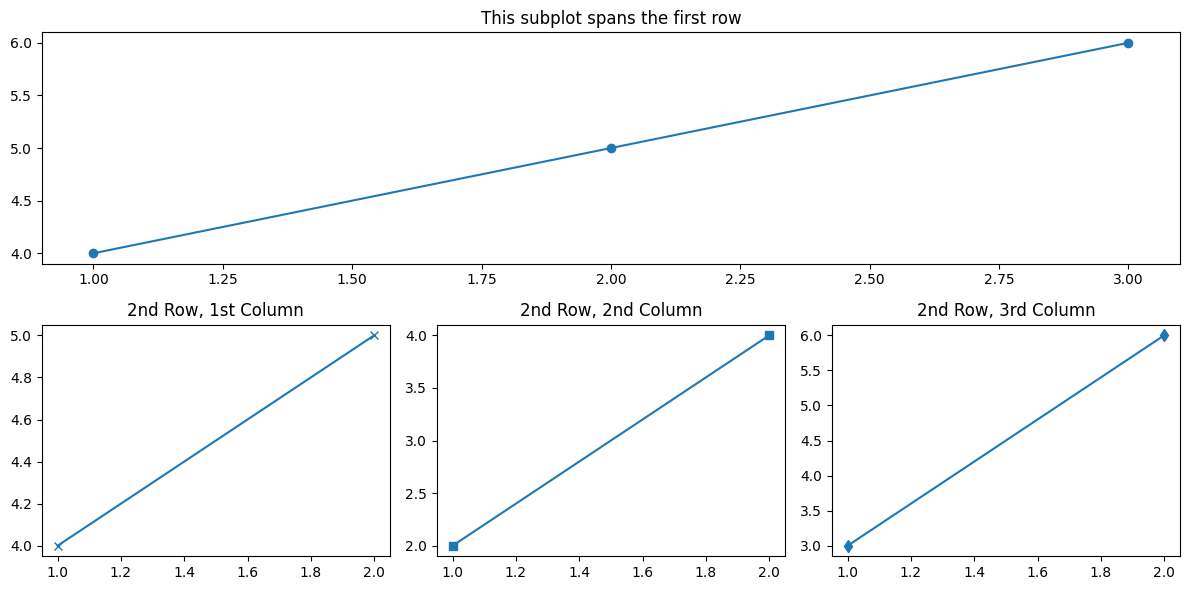

In [53]:
plt.figure(figsize=(12, 6))

# Subplot spanning the entire first row (1st to 3rd index)
plt.subplot(2, 3, (1, 3))
plt.title('This subplot spans the first row')
plt.plot([1, 2, 3], [4, 5, 6], marker='o')

# Create individual subplots for the remaining cells
plt.subplot(2, 3, 4)
plt.title('2nd Row, 1st Column')
plt.plot([1, 2], [4, 5], marker='x')

plt.subplot(2, 3, 5)
plt.title('2nd Row, 2nd Column')
plt.plot([1, 2], [2, 4], marker='s')

plt.subplot(2, 3, 6)
plt.title('2nd Row, 3rd Column')
plt.plot([1, 2], [3, 6], marker='d')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()